# Bose Einstein Condensation

-----------------

* Permutation Sample

In [1]:
%matplotlib inline

In [2]:
import random

N = 3
statistics = {}
L = range(N)
nsteps = 10
for step in range(nsteps):
    i = random.randint(0, N - 1)
    j = random.randint(0, N - 1)
    L[i], L[j] = L[j], L[i]
    if tuple(L) in statistics: 
        statistics[tuple(L)] += 1
    else:
        statistics[tuple(L)] = 1
    print L
    print range(N)
    print

for item in statistics:
    print item, statistics[item]


[2, 1, 0]
[0, 1, 2]

[1, 2, 0]
[0, 1, 2]

[0, 2, 1]
[0, 1, 2]

[0, 1, 2]
[0, 1, 2]

[0, 1, 2]
[0, 1, 2]

[0, 1, 2]
[0, 1, 2]

[2, 1, 0]
[0, 1, 2]

[2, 0, 1]
[0, 1, 2]

[2, 1, 0]
[0, 1, 2]

[2, 1, 0]
[0, 1, 2]

(0, 1, 2) 3
(1, 2, 0) 1
(2, 1, 0) 4
(0, 2, 1) 1
(2, 0, 1) 1


* Marcov Harmonic Boson

In [3]:
import random, math
 
def levy_harmonic_path(k, beta):
    xk = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = (1.0 / math.tanh(beta) +
                     1.0 / math.tanh((k - j) * beta))
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + xk[d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x
 
def rho_harm(x, xp, beta):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 128
T_star = 0.9
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
nsteps = 1000
positions = {}
for j in range(N):
    a = levy_harmonic_path(1, beta)
    positions[a[0]] = a[0]
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]: break
        else: boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2


* Marcov Harmonic Boson Movie

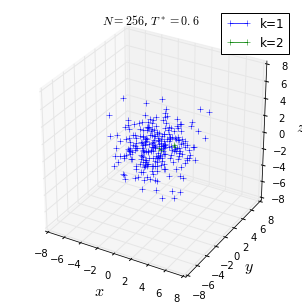

In [4]:
import random, math, pylab, mpl_toolkits.mplot3d
 
def levy_harmonic_path(k, beta):
    xk = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = (1.0 / math.tanh(beta) +
                     1.0 / math.tanh((k - j) * beta))
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + xk[d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x
 
def rho_harm(x, xp, beta):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 256
T_star = 0.6
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
nsteps = 1000
positions = {}
for j in range(N):
    a = levy_harmonic_path(1, beta)
    positions[a[0]] = a[0]
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]: break
        else: boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
list_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
n_colors = len(list_colors)
dict_colors = {}
i_color = 0
# find and plot permutation cycles:
while positions:
    x, y, z = [], [], []
    starting_boson = positions.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions.pop(boson_old)
        if boson_new == starting_boson: break
        else: boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, color + '+-', lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, color + '+-', label='k=%i' % len_cycle, lw=0.75)
# finalize plot
pylab.title('$N=%i$, $T^*=%s$' % (N, T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
ax.set_xlim3d([-8, 8])
ax.set_ylim3d([-8, 8])
ax.set_zlim3d([-8, 8])
#pylab.savefig('snapshot_bosons_3d_N%04i_Tstar%04.2f.png' % (N, T_star))
pylab.show()


----------------

# TUTORIAL

* Permutation Sample Cycle

In [6]:
import random

N = 20
stats = [0] * (N + 1)
L = range(N)
nsteps = 100
for step in range(nsteps):
    i = random.randint(0, N - 1)
    j = random.randint(0, N - 1)
    L[i], L[j] = L[j], L[i]
    if step % 100 == 0: 
        cycle_dict = {}
        for k in range(N):
            cycle_dict[k] = L[k]
        while cycle_dict != {}:
            starting_element = cycle_dict.keys()[0]
            cycle_length = 0
            old_element = starting_element
            while True:
                cycle_length += 1
                new_element = cycle_dict.pop(old_element)
                if new_element == starting_element: break
                else: old_element = new_element
            stats[cycle_length] += 1
for k in range(1, N + 1):
    print k, stats[k] 


1 18
2 1
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0


* Direct Harmonic Boson

In [7]:
import math, random

def z(k, beta):
    return (1.0 - math.exp(- k * beta)) ** (-3)

def canonic_recursion(N, beta):
    Z = [1.0]
    for M in range(1, N + 1):
        Z.append(sum(Z[k] * z(M - k, beta) \
                     for k in range(M)) / M)
    return Z

def make_pi_list(Z, M):
   pi_list = [0.0] + [z(k, beta) * Z[M - k] / Z[M] / M \
                              for k  in range(1, M + 1)]
   pi_cumulative = [0.0]
   for k in range(1, M + 1):
      pi_cumulative.append(pi_cumulative[k - 1] + pi_list[k])
   return pi_cumulative

def naive_tower_sample(pi_cumulative):
    eta = random.uniform(0.0, 1.0)
    for k in range(len(pi_cumulative)):
        if eta < pi_cumulative[k]: break
    return k

def levy_harmonic_path(dtau, N): 
   beta = N * dtau
   x_N = random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(beta / 2.0)))
   x = [x_N]
   for k in range(1, N):
      dtau_prime = (N - k) * dtau
      Upsilon_1 = 1.0 / math.tanh(dtau) + \
                  1.0 / math.tanh(dtau_prime)
      Upsilon_2 = x[k - 1] / math.sinh(dtau) + \
                  x_N / math.sinh(dtau_prime)
      x_mean = Upsilon_2 / Upsilon_1
      sigma = 1.0 / math.sqrt(Upsilon_1)
      x.append(random.gauss(x_mean, sigma))
   return x

### main program starts here ###
N = 8
T_star = 0.1
beta = 1.0 / N ** (1.0 / 3.0) / T_star
n_steps = 1000
Z = canonic_recursion(N, beta)
for step in range(n_steps):
    N_tmp = N
    x_config = []
    y_config = []
    z_config = []
    while N_tmp > 0:
       pi_sum = make_pi_list(Z, N_tmp)
       k = naive_tower_sample(pi_sum)
       x_config += levy_harmonic_path(beta, k)
       y_config += levy_harmonic_path(beta, k)
       z_config += levy_harmonic_path(beta, k)
       N_tmp -= k


* Canonic Harmonic Recursion

In [9]:
import math

def z(k, beta):
    return 1.0 / (1.0 - math.exp(- k * beta)) ** 3

def canonic_recursion(N, beta):
    Z = [1.0]
    for M in range(1, N + 1):
        Z.append(sum(Z[k] * z(M - k, beta) \
                     for k in range(M)) / M)
    return Z

N = 100
beta = 1.0
Z = canonic_recursion(N, beta)
print N, Z[-1]

100 27.328822346


* Canonic Recurrsion Movie

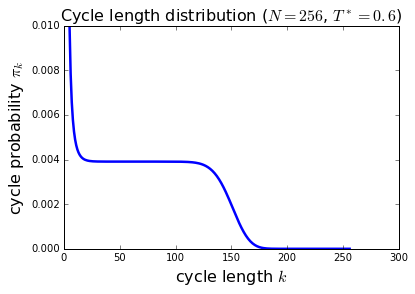

In [10]:
import math, pylab

def z(k, beta):
    return 1.0 / (1.0 - math.exp(- k * beta)) ** 3

def canonic_recursion(N, beta):
    Z = [1.0]
    for M in range(1, N + 1):
        Z.append(sum(Z[k] * z(M - k, beta) \
                     for k in range(M)) / M)
    return Z

N = 256
T_star = 0.6
beta = 1.0 / N ** (1.0 / 3.0) / T_star
Z = canonic_recursion(N, beta)
pi_k = [(z(k, beta) * Z[N - k] / Z[-1]) / float(N) for k in range(1, N + 1)]
# graphics output
pylab.plot(range(1, N + 1), pi_k, 'b-', lw=2.5)
pylab.ylim(0.0, 0.01)
pylab.xlabel('cycle length $k$', fontsize=16)
pylab.ylabel('cycle probability $\pi_k$', fontsize=16)
pylab.title('Cycle length distribution ($N=%i$, $T^*=%s$)' % (N, T_star), fontsize=16)
#pylab.savefig('plot-prob_cycle_length.png')
pylab.show()